# Telco Customer Churn


### customerID
Customer ID


### gender
Whether the customer is a male or a female


### SeniorCitizen
Whether the customer is a senior citizen or not (1, 0)


### Partner
Whether the customer has a partner or not (Yes, No)


### Dependents
Whether the customer has dependents or not (Yes, No)


### tenure
Number of months the customer has stayed with the company


### PhoneService
Whether the customer has a phone service or not (Yes, No)


### MultipleLines
Whether the customer has multiple lines or not (Yes, No, No phone service)


### InternetService
Customer’s internet service provider (DSL, Fiber optic, No)


### OnlineSecurity
Whether the customer has online security or not (Yes, No, No internet service)


### OnlineBackup
Whether the customer has online backup or not (Yes, No, No internet service)


### DeviceProtection
Whether the customer has device protection or not (Yes, No, No internet service)


### TechSupport
Whether the customer has tech support or not (Yes, No, No internet service)


### StreamingTV
Whether the customer has streaming TV or not (Yes, No, No internet service)


### StreamingMovies
Whether the customer has streaming movies or not (Yes, No, No internet service)


### Contract
The contract term of the customer (Month-to-month, One year, Two year)


### PaperlessBilling
Whether the customer has paperless billing or not (Yes, No)


### PaymentMethod
The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))


### MonthlyCharges
The amount charged to the customer monthly


### TotalCharges
The total amount charged to the customer


### Churn
Whether the customer churned or not (Yes or No)


# Importing Libraries & Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Telco_Customer_Churn.csv'
tc = pd.read_csv(file_path)

In [ ]:
tc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
print('Columns in this dataset are:',list(tc.columns))

Columns in this dataset are: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [ ]:
print('There are {} rows in the dataset'.format(tc.shape[0]))
print('There are {} columns in the dataset'.format(tc.shape[1]))

There are 7043 rows in the dataset
There are 21 columns in the dataset


In [ ]:
tc.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
tc.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
tc = tc.drop('customerID',axis =1)

In [ ]:
tc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# EDA

## Univariate Analysis

## Categorical Columns

### gender
Whether the customer is a male or a female

In [ ]:
print("The gender column has {} missing values.".format(tc['gender'].isnull().sum()))

The gender column has 0 missing values.


Text(0.5, 1.0, 'gender Distribution')

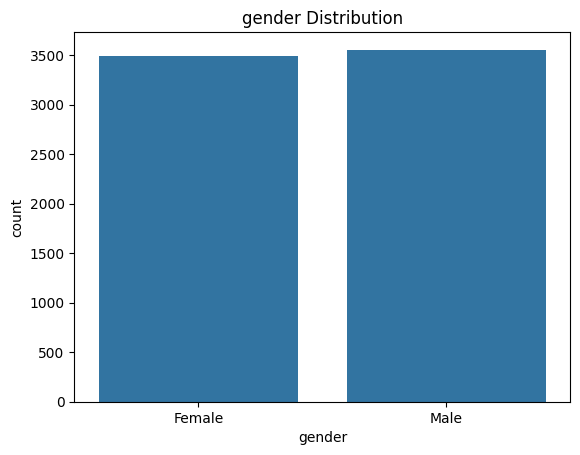

In [ ]:
#plt.figure(figsize= (4,4))
sns.countplot(tc, x=tc['gender'])
plt.xlabel('gender')
plt.title('gender Distribution')

### Conclusion
From the Gender Distribution graph, we can say that the gender column is balanced (the column contains almost equal number of male and female).

### SeniorCitizen
Whether the customer is a senior citizen or not (1, 0)

In [ ]:
print('The SeniorCitizen Column has {} missing values.'.format(tc['SeniorCitizen'].isnull().sum()))

The SeniorCitizen Column has 0 missing values.


Text(0.5, 1.0, 'SeniorCitizen Distribution')

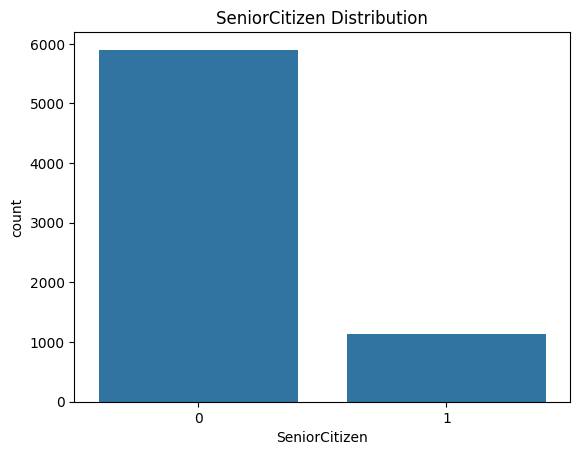

In [ ]:
#plt.figure(figsize= (4,4))
sns.countplot(tc, x=tc['SeniorCitizen'])
plt.xlabel('SeniorCitizen')
plt.title('SeniorCitizen Distribution')

### Conclusion
From SeniorCitizen Distribution graph, we can say that there are very few number of senior citizens as compared to others.

### Partner
Whether the customer has a partner or not (Yes, No)

In [ ]:
print('The partner column has {} missing values.'.format(tc['Partner'].isnull().sum()))

The partner column has 0 missing values.


Text(0.5, 1.0, 'Partner Distribution')

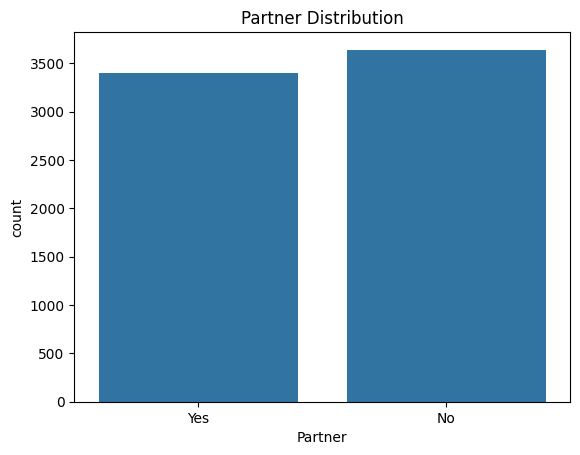

In [ ]:
#plt.figure(figsize= (4,4))
sns.countplot(tc, x=tc['Partner'])
plt.xlabel('Partner')
plt.title('Partner Distribution')

### Conclusion
From the Partner Distribution graph, we can say that the number of customers having partner is somewhat near to those who don't.

### Dependents
Whether the customer has dependents or not (Yes, No)

In [ ]:
print('The Dependents column has {} missing values.'.format(tc['Dependents'].isnull().sum()))

The Dependents column has 0 missing values.


Text(0.5, 1.0, 'Dependents Distribution')

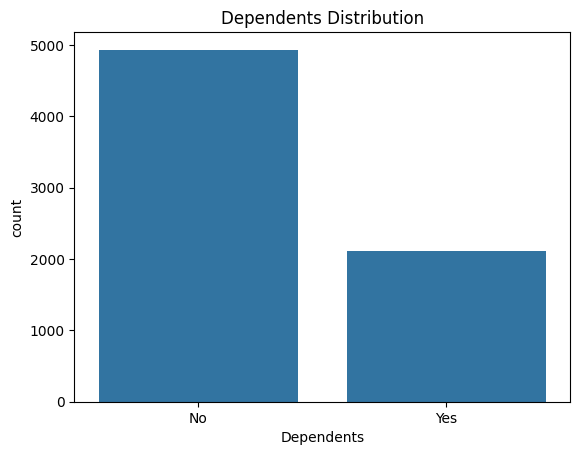

In [ ]:
#plt.figure(figsize= (4,4))
sns.countplot(tc, x=tc['Dependents'])
plt.xlabel('Dependents')
plt.title('Dependents Distribution')

### Conclusion
From the Dependents Distribution graph, we can say that most of the customers don't have dependents.

### PhoneService
Whether the customer has a phone service or not (Yes, No)

In [ ]:
print('The PhoneService column has {} missing values.'.format(tc['PhoneService'].isnull().sum()))

The PhoneService column has 0 missing values.


Text(0.5, 1.0, 'PhoneService Distribution')

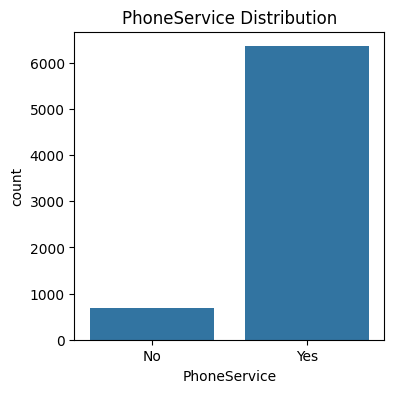

In [ ]:
plt.figure(figsize= (4,4))
sns.countplot(tc, x=tc['PhoneService'])
plt.xlabel('PhoneService')
plt.title('PhoneService Distribution')

### Conclusion
From the PhoneService Distribution graph, we can say that most of the customer has a phone service.

### MultipleLines
Whether the customer has multiple lines or not (Yes, No, No phone service)

In [ ]:
print('The MultipleLines column has {} missing values.'.format(tc['MultipleLines'].isnull().sum()))

The MultipleLines column has 0 missing values.


Text(0.5, 1.0, 'MultipleLines Distribution')

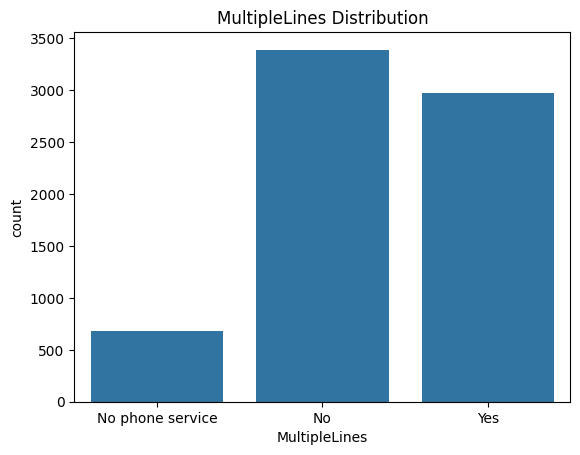

In [ ]:
#plt.figure(figsize= (4,4))
sns.countplot(tc, x=tc['MultipleLines'])
plt.xlabel('MultipleLines')
plt.title('MultipleLines Distribution')

### Conclusion
From the MultipleLines Distribution graph, we can say that most of the customer don't have Multiple Lines,
many of the customer do have MultipleLines and few of the customers have no phone service at all.

### InternetService
Customer’s internet service provider (DSL, Fiber optic, No)

In [ ]:
print('The InternetService column has {} missing values.'.format(tc['InternetService'].isnull().sum()))

The InternetService column has 0 missing values.


Text(0.5, 1.0, 'Internet Service Distribution')

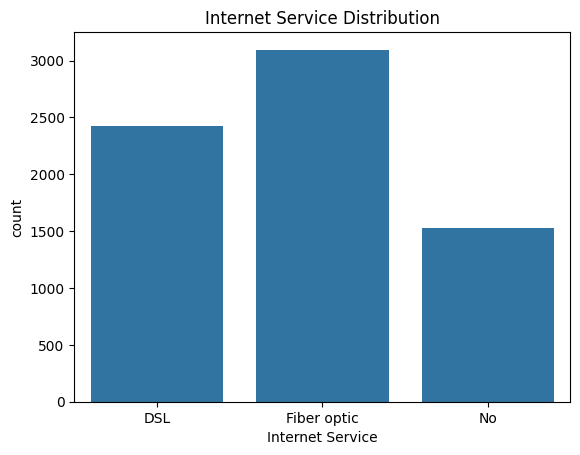

In [ ]:
#plt.figure(figsize= (4,4))
sns.countplot(tc, x=tc['InternetService'])
plt.xlabel('Internet Service')
plt.title('Internet Service Distribution')

### Conclusion
From the InternetService Distribution graph, we can say that most of the customer have DSL as Internet Service Provider,
many of the customer do have Fiber optic as Internet Service Provider and few of the customers have no internet service at all.

### OnlineSecurity
Whether the customer has online security or not (Yes, No, No internet service)

In [ ]:
print('The OnlineSecurity column has {} missing values.'.format(tc['OnlineSecurity'].isnull().sum()))

The OnlineSecurity column has 0 missing values.


Text(0.5, 1.0, 'OnlineSecurity Distribution')

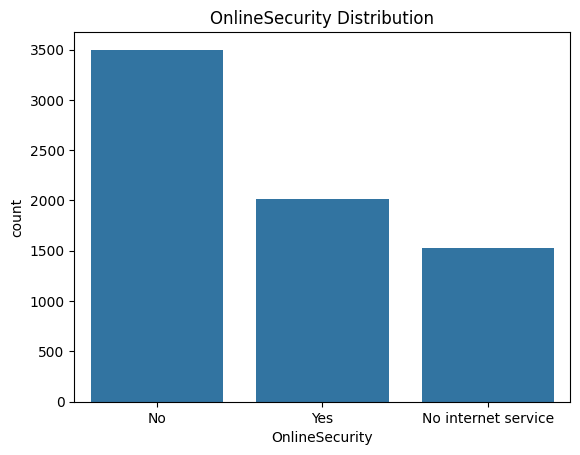

In [ ]:
#plt.figure(figsize= (4,4))
sns.countplot(tc, x=tc['OnlineSecurity'])
plt.xlabel('OnlineSecurity')
plt.title('OnlineSecurity Distribution')

### Conclusion
From the OnlineSecurity Distribution graph, we can say that most of the customer don't have OnlineSecurity,
many of the customer do have and few of the customers have no internet service at all.

### OnlineBackup
Whether the customer has online backup or not (Yes, No, No internet service)

In [ ]:
print('The OnlineBackup column has {} missing values.'.format(tc['OnlineBackup'].isnull().sum()))

The OnlineBackup column has 0 missing values.


Text(0.5, 1.0, 'OnlineBackup Distribution')

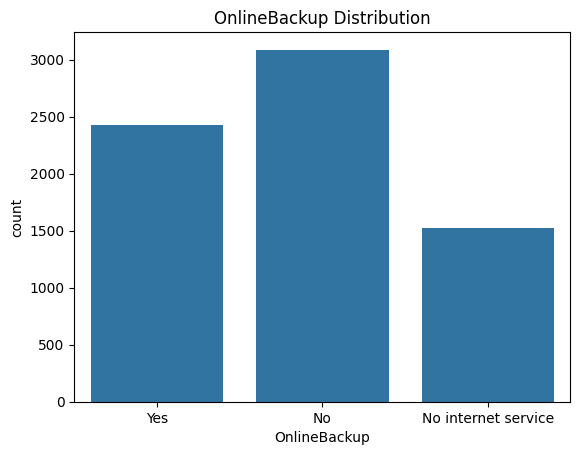

In [ ]:
#plt.figure(figsize= (4,4))
sns.countplot(tc, x=tc['OnlineBackup'])
plt.xlabel('OnlineBackup')
plt.title('OnlineBackup Distribution')

### Conclusion
From OnlineBackup Distribution , we can say that most of the customer don't have online backup, many of the customer have online backup and few of them have no internet service.

### DeviceProtection
Whether the customer has device protection or not (Yes, No, No internet service)

In [ ]:
print('The DeviceProtection column has {} missing values.'.format(tc['DeviceProtection'].isnull().sum()))

The DeviceProtection column has 0 missing values.


Text(0.5, 1.0, 'DeviceProtection Distribution')

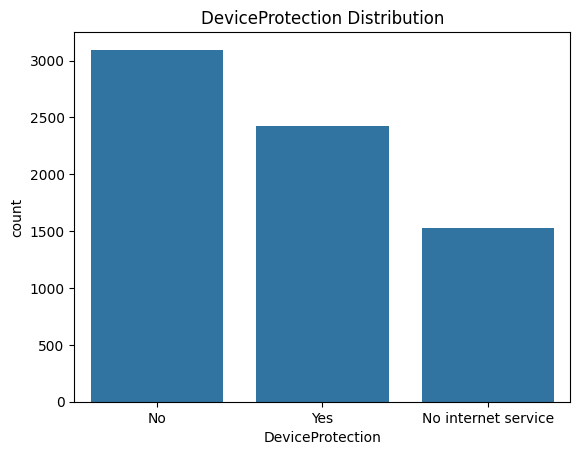

In [ ]:
#plt.figure(figsize= (4,4))
sns.countplot(tc, x=tc['DeviceProtection'])
plt.xlabel('DeviceProtection')
plt.title('DeviceProtection Distribution')

### Conclusion
From the DeviceProtection Distribution graph, we can say that most of the customer don't have DeviceProtection,
many of the customer do have and few of the customers have no internet service at all.

### TechSupport
Whether the customer has tech support or not (Yes, No, No internet service)

In [ ]:
print('The TechSupport column has {} missing values.'.format(tc['TechSupport'].isnull().sum()))

The TechSupport column has 0 missing values.


Text(0.5, 1.0, 'TechSupport Distribution')

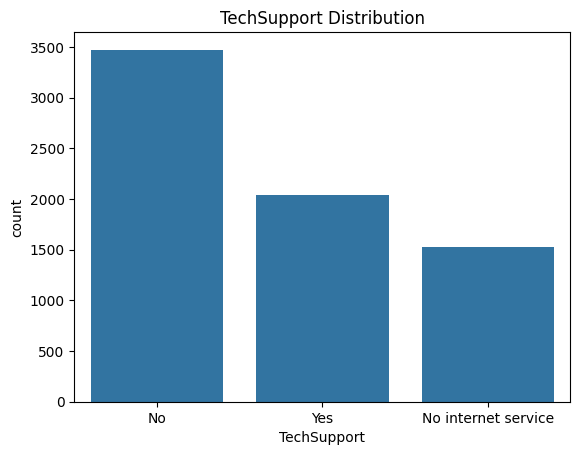

In [ ]:
#plt.figure(figsize= (4,4))
sns.countplot(tc, x=tc['TechSupport'])
plt.xlabel('TechSupport')
plt.title('TechSupport Distribution')

### Conclusion
From the TechSupport Distribution graph, we can say that most of the customer don't have TechSupport,
many of the customer do have and few of the customers have no internet service at all.

### StreamingTV
Whether the customer has streaming TV or not (Yes, No, No internet service)

In [ ]:
print('The StreamingTV column has {} missing values.'.format(tc['StreamingTV'].isnull().sum()))

The StreamingTV column has 0 missing values.


Text(0.5, 1.0, 'StreamingTV Distribution')

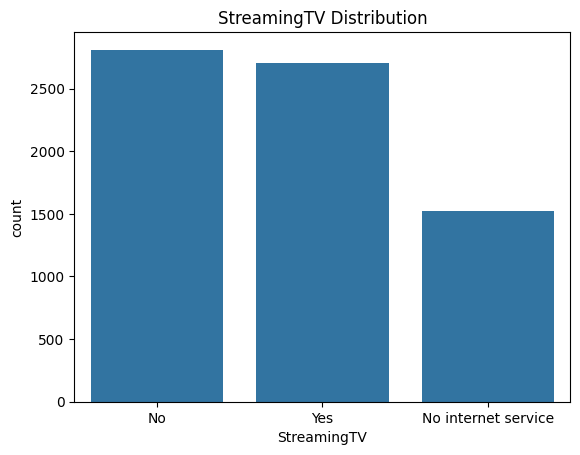

In [ ]:
#plt.figure(figsize= (4,4))
sns.countplot(tc, x=tc['StreamingTV'])
plt.xlabel('StreamingTV')
plt.title('StreamingTV Distribution')

### Conclusion
From the StreamingTV Distribution graph, we can say that most of the customer aren't StreamingTV, but almost
same number of customer are StreamingTV and few of the customers have no internet service at all.

### StreamingMovies
Whether the customer has streaming movies or not (Yes, No, No internet service)

In [ ]:
print('The StreamingMovies column has {} missing values.'.format(tc['StreamingMovies'].isnull().sum()))

The StreamingMovies column has 0 missing values.


Text(0.5, 1.0, 'StreamingMovies Distribution')

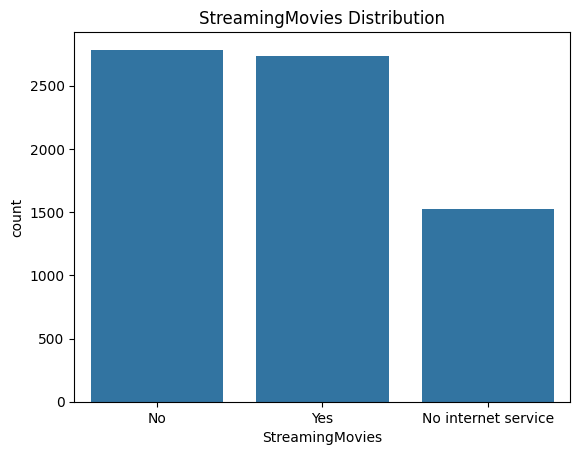

In [ ]:
#plt.figure(figsize= (4,4))
sns.countplot(tc, x=tc['StreamingMovies'])
plt.xlabel('StreamingMovies')
plt.title('StreamingMovies Distribution')

### Conclusion
From the StreamingMovies Distribution graph, we can say that most of the customer aren't StreamingMovies, but almost
same number of customer are StreamingTV and few of the customers have no internet service at all.

### Contract
The contract term of the customer (Month-to-month, One year, Two year)

In [ ]:
print('The Contract column has {} missing values.'.format(tc['Contract'].isnull().sum()))

The Contract column has 0 missing values.


Text(0.5, 1.0, 'Contract Distribution')

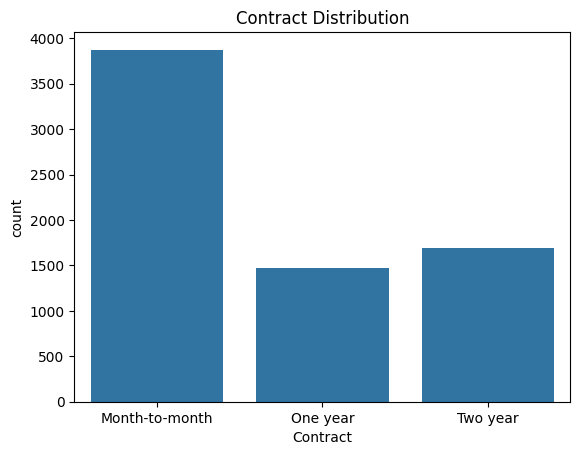

In [ ]:
#plt.figure(figsize= (4,4))
sns.countplot(tc, x=tc['Contract'])
plt.xlabel('Contract')
plt.title('Contract Distribution')

### Conclusion
From the Contract Distribution graph, we can say that most of the customer have Month-to-month contract,
few of the customers have one year contract and customer having two year contract is more than one year.

### PaperlessBilling
Whether the customer has paperless billing or not (Yes, No)

In [ ]:
print('The PaperlessBilling column has {} missing values.'.format(tc['PaperlessBilling'].isnull().sum()))

The PaperlessBilling column has 0 missing values.


Text(0.5, 1.0, 'PaperlessBilling Distribution')

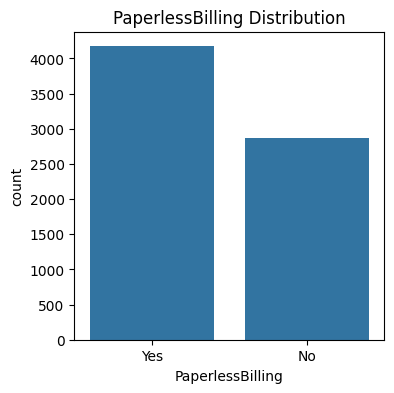

In [ ]:
plt.figure(figsize= (4,4))
sns.countplot(tc, x=tc['PaperlessBilling'])
plt.xlabel('PaperlessBilling')
plt.title('PaperlessBilling Distribution')

### Conclusion
From the PaperlessBilling Distribution graph, we can say that most of the customer are having PaperlessBilling, but those who aren't, are lesser in numbers.

### PaymentMethod
The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

In [ ]:
print('The PaymentMethod column has {} missing values.'.format(tc['PaymentMethod'].isnull().sum()))

The PaymentMethod column has 0 missing values.


Text(0.5, 1.0, 'PaymentMethod Distribution')

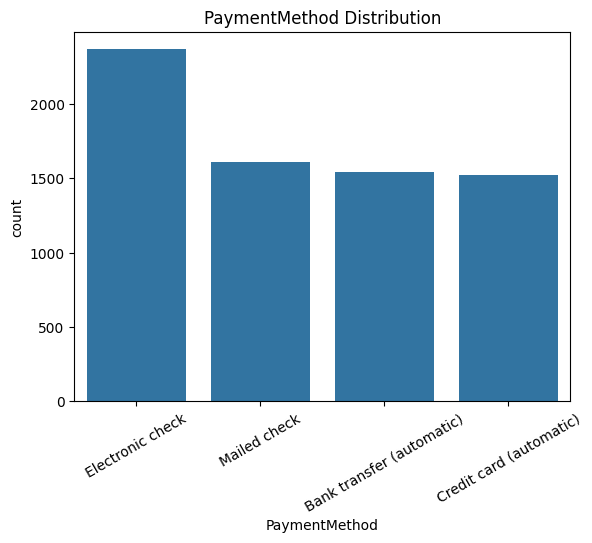

In [ ]:
#plt.figure(figsize= (4,4))
sns.countplot(tc, x=tc['PaymentMethod'])
#plt.xlabel('PaymentMethod')
plt.xticks(rotation=30)
plt.title('PaymentMethod Distribution')

### Conclusion
From the PaymentMethod Distribution graph, we can say that most of the customer are using Electronic Check as PaymentMethod, but rest all are almost
same in number and lesser than Electronic Check.

### tenure
Number of months the customer has stayed with the company

In [ ]:
print('The tenure column has {} missing values.'.format(tc['tenure'].isnull().sum()))

The tenure column has 0 missing values.


Text(0.5, 1.0, 'tenure Distribution')

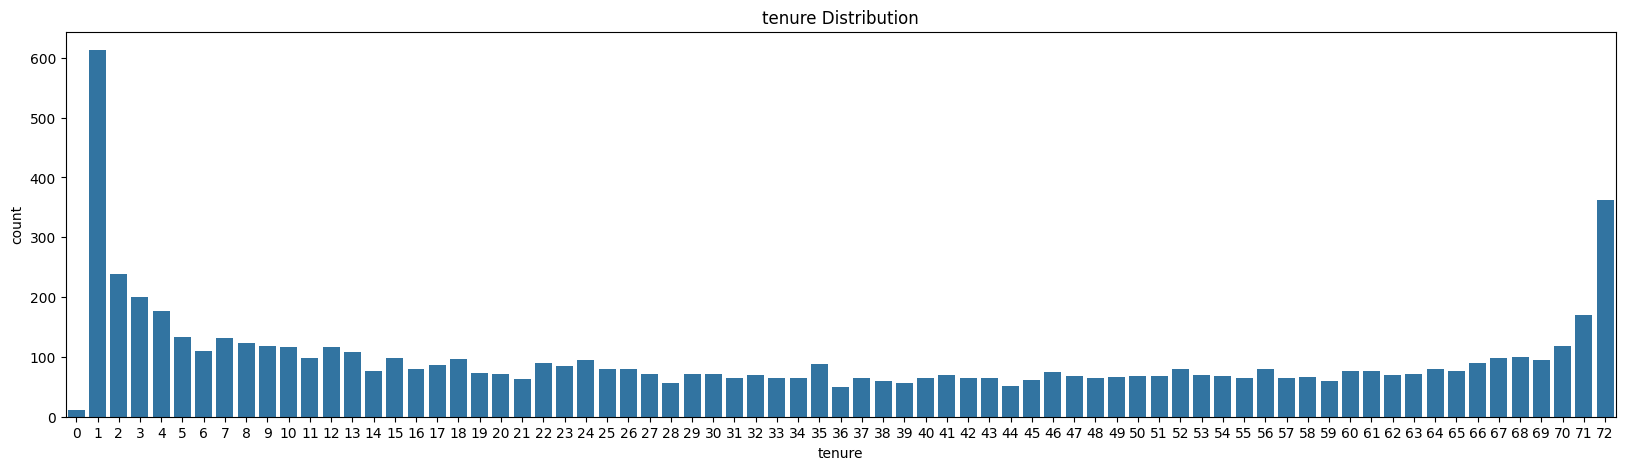

In [ ]:
plt.figure(figsize= (20,5))
sns.countplot(data = tc, x = tc['tenure'])
#plt.xticks(rotation=30)
plt.xlabel('tenure')
plt.title('tenure Distribution')

### Conclusion
From the tenure Distribution graph, we can say that tenure has a bimodal distribution.

# Numerical Columns

### MonthlyCharges
The amount charged to the customer monthly

In [ ]:
print('The MonthlyCharges column has {} missing values.'.format(tc['MonthlyCharges'].isnull().sum()))

The MonthlyCharges column has 0 missing values.


Text(0.5, 1.0, 'MonthlyCharges Distribution')

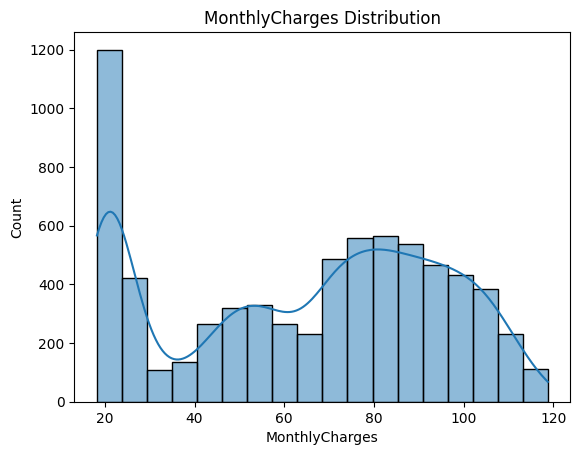

In [ ]:
#plt.figure(figsize= (6,4))
sns.histplot(tc['MonthlyCharges'], kde=True)
plt.xlabel('MonthlyCharges')
plt.title('MonthlyCharges Distribution')

<Axes: ylabel='MonthlyCharges'>

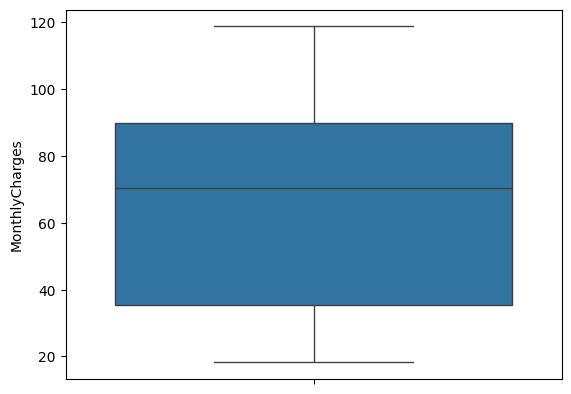

In [ ]:
sns.boxplot(tc, y=tc['MonthlyCharges'])


In [ ]:
print("Min Value for MonthlyCharges is {}".format(min(tc['MonthlyCharges'])))
print("10 percentile of MonthlyCharges is {}".format(np.percentile(tc['MonthlyCharges'], 10)))
print("50 percentile of MonthlyCharges is {}".format(np.percentile(tc['MonthlyCharges'], 50)))
print("95 percentile of MonthlyCharges is {}".format(np.percentile(tc['MonthlyCharges'], 95)))
print("99 percentile of MonthlyCharges is {}".format(np.percentile(tc['MonthlyCharges'], 99)))
print("Max Value for MonthlyCharges is {}".format(max(tc['MonthlyCharges'])))

Min Value for MonthlyCharges is 18.25
10 percentile of MonthlyCharges is 20.05
50 percentile of MonthlyCharges is 70.35
95 percentile of MonthlyCharges is 107.4
99 percentile of MonthlyCharges is 114.729
Max Value for MonthlyCharges is 118.75


### Conclusion
From the MonthlyCharges Distribution graph, we cannot conclude anything whether it is a left skewed or a right skewed distribution.
And from the boxplot, we can say that the MonthlyCharges column has no outlier.

### TotalCharges
The total amount charged to the customer

In [ ]:
tc['TotalCharges']= tc['TotalCharges'].replace(" ", np.nan)

In [ ]:
tc['TotalCharges'] = pd.to_numeric(tc['TotalCharges'])

In [ ]:
print('The TotalCharges column has {} missing values.'.format(tc['TotalCharges'].isnull().sum()))

The TotalCharges column has 11 missing values.


In [ ]:
tc['TotalCharges'] = tc['TotalCharges'].fillna(tc['TotalCharges'].median())

In [ ]:
print('The TotalCharges column has {} missing values.'.format(tc['TotalCharges'].isnull().sum()))

The TotalCharges column has 0 missing values.


In [ ]:
tc['TotalCharges'].dtype

dtype('float64')

In [ ]:
#tc = tc.dropna(subset=['TotalCharges'])

Text(0.5, 1.0, 'TotalCharges Distribution')

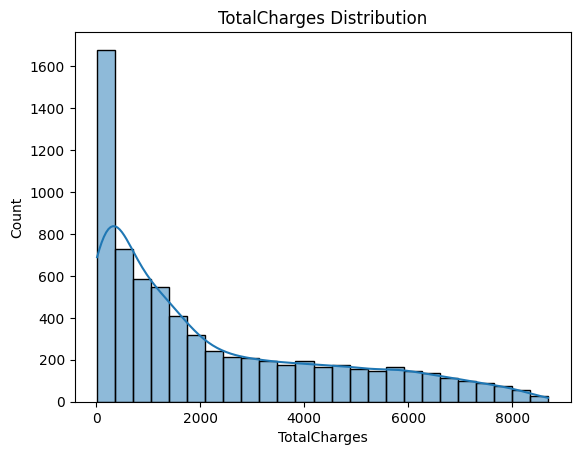

In [ ]:
#plt.figure(figsize=(6,4))
sns.histplot(tc['TotalCharges'], kde=True)
plt.xlabel('TotalCharges')
plt.title('TotalCharges Distribution')

Text(0.5, 1.0, 'TotalCharges Boxplot')

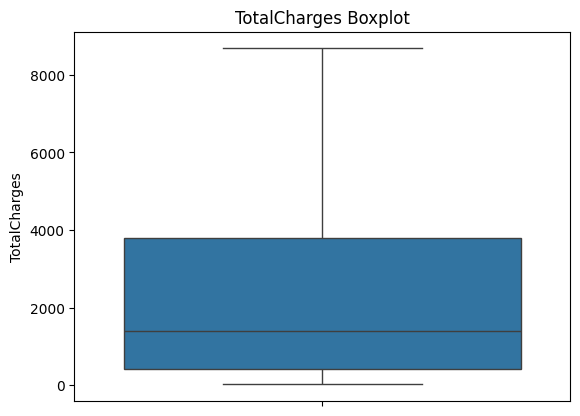

In [ ]:
sns.boxplot(tc, y=tc['TotalCharges'])
plt.title("TotalCharges Boxplot")

In [ ]:
print("Min Value for TotalCharges is {}".format(min(tc['TotalCharges'])))
print("10 percentile of TotalCharges is {}".format(np.percentile(tc['TotalCharges'], 10)))
print("50 percentile of TotalCharges is {}".format(np.percentile(tc['TotalCharges'], 50)))
print("95 percentile of TotalCharges is {}".format(np.percentile(tc['TotalCharges'], 95)))
print("99 percentile of TotalCharges is {}".format(np.percentile(tc['TotalCharges'], 99)))
print("Max Value for TotalCharges is {}".format(max(tc['TotalCharges'])))

Min Value for TotalCharges is 18.8
10 percentile of TotalCharges is 84.61
50 percentile of TotalCharges is 1397.475
95 percentile of TotalCharges is 6921.024999999998
99 percentile of TotalCharges is 8039.255999999999
Max Value for TotalCharges is 8684.8


### Conclusion
From the TotalCharges Distribution graph, we can say that it is a left skewed distribution but from the boxplot we can see that maximum value is 8648.8 which is much more than Minimum value, 18.8. It means that the column has some outliers but we must not remove them as it is possible to have such values for TotalCharges.

### Churn
Whether the customer churned or not (Yes or No)

In [ ]:
print('The Churn column has {} missing values.'.format(tc['Churn'].isnull().sum()))

The Churn column has 0 missing values.


/tmp/ipython-input-3599404455.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=tc, palette="Set2")


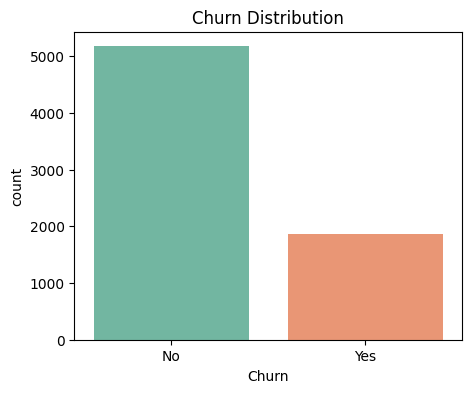

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x="Churn", data=tc, palette="Set2")
plt.title("Churn Distribution")
plt.show()

### Conclusion
From the Churn Distribution, we can say that the target variable 'Churn' has not evenly spread values. It means it is imbalanced.

# Bivariate Analysis

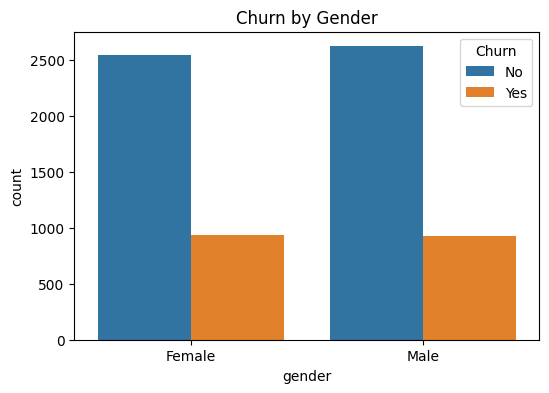

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=tc, x="gender", hue="Churn")
plt.title("Churn by Gender")
plt.show()

In [ ]:
print("Percentage of females who churned :", round((
    tc[(tc['gender'] == 'Female') & (tc['Churn'] == 'Yes')].shape[0] /
    tc[tc['gender'] == 'Female'].shape[0]
) * 100, 2), "%")

print("Percentage of males who churned :",round((
    tc[(tc['gender'] == 'Male') & (tc['Churn'] == 'Yes')].shape[0] /
    tc[tc['gender'] == 'Male'].shape[0]
) * 100, 2), "%")

Percentage of females who churned : 26.92 %
Percentage of males who churned : 26.16 %


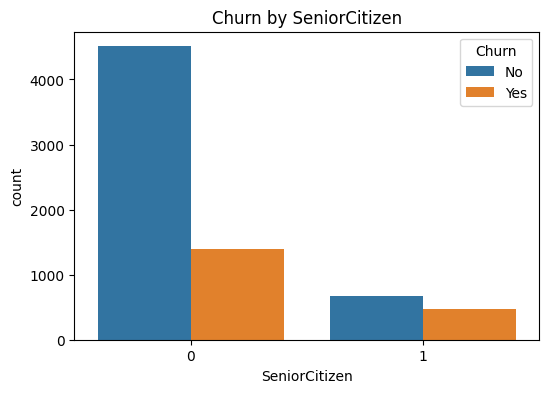

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=tc, x="SeniorCitizen", hue="Churn")
plt.title("Churn by SeniorCitizen")
plt.show()

In [ ]:
print("Percentage of SeniorCitizen who churned :", round((
    tc[(tc['SeniorCitizen'] == 1) & (tc['Churn'] == 'Yes')].shape[0] /
    tc[tc['SeniorCitizen'] == 1].shape[0]
) * 100, 2), "%")

print("Percentage of non SeniorCitizen who churned :", round((
    tc[(tc['SeniorCitizen'] == 0) & (tc['Churn'] == 'Yes')].shape[0] /
    tc[tc['SeniorCitizen'] == 0].shape[0]
) * 100, 2), "%")

Percentage of SeniorCitizen who churned : 41.68 %
Percentage of non SeniorCitizen who churned : 23.61 %


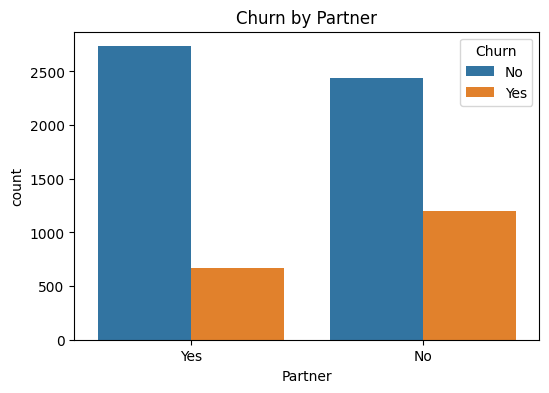

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=tc, x="Partner", hue="Churn")
plt.title("Churn by Partner")
plt.show()

In [ ]:
print("Percentage of people with Partner who churned :", round((
    tc[(tc['Partner'] == 'Yes') & (tc['Churn'] == 'Yes')].shape[0] /
    tc[tc['Partner'] == 'Yes'].shape[0]
) * 100, 2), "%")

print("Percentage of people without Partner who churned :", round((
    tc[(tc['Partner'] == 'No') & (tc['Churn'] == 'Yes')].shape[0] /
    tc[tc['Partner'] == 'No'].shape[0]
) * 100, 2), "%")

Percentage of people with Partner who churned : 19.66 %
Percentage of people without Partner who churned : 32.96 %


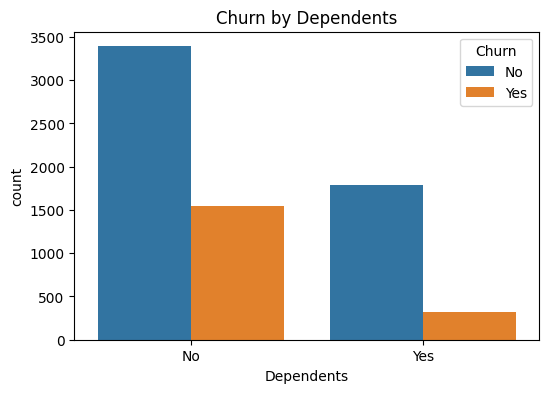

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=tc, x="Dependents", hue="Churn")
plt.title("Churn by Dependents")
plt.show()

In [ ]:
print("Percentage of people with Dependents who churned :", round((
    tc[(tc['Dependents'] == 'Yes') & (tc['Churn'] == 'Yes')].shape[0] /
    tc[tc['Dependents'] == 'Yes'].shape[0]
) * 100, 2), "%")

print("Percentage of people without Dependents who churned :", round((
    tc[(tc['Dependents'] == 'No') & (tc['Churn'] == 'Yes')].shape[0] /
    tc[tc['Dependents'] == 'No'].shape[0]
) * 100, 2), "%")

Percentage of people with Dependents who churned : 15.45 %
Percentage of people without Dependents who churned : 31.28 %


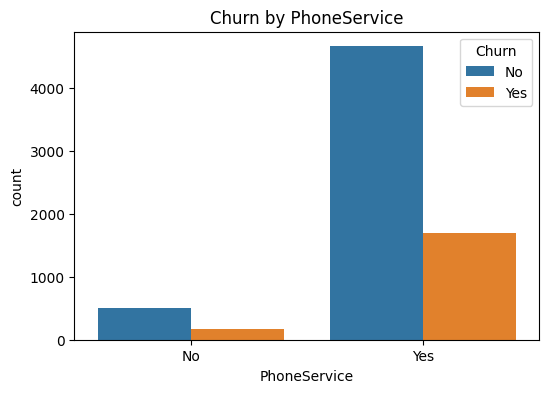

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=tc, x="PhoneService", hue="Churn")
plt.title("Churn by PhoneService")
plt.show()

In [ ]:
print("Percentage of people with PhoneService who churned :", round((
    tc[(tc['PhoneService'] == 'Yes') & (tc['Churn'] == 'Yes')].shape[0] /
    tc[tc['PhoneService'] == 'Yes'].shape[0]
) * 100, 2), "%")

print("Percentage of people without PhoneService who churned :", round((
    tc[(tc['PhoneService'] == 'No') & (tc['Churn'] == 'Yes')].shape[0] /
    tc[tc['PhoneService'] == 'No'].shape[0]
) * 100, 2), "%")

Percentage of people with PhoneService who churned : 26.71 %
Percentage of people without PhoneService who churned : 24.93 %


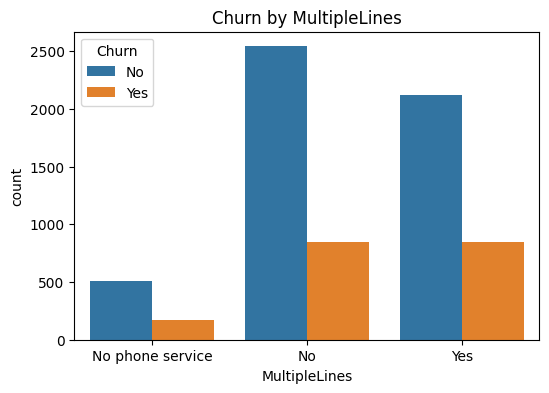

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=tc, x="MultipleLines", hue="Churn")
plt.title("Churn by MultipleLines")
plt.show()

In [ ]:
print("Percentage of Customer with MultipleLines who churned :", round((
    tc[(tc['MultipleLines'] == 'Yes') & (tc['Churn'] == 'Yes')].shape[0] /
    tc[tc['MultipleLines'] == 'Yes'].shape[0]
) * 100, 2), "%")

print("Percentage of people without MultipleLines who churned :", round((
    tc[(tc['MultipleLines'] == 'No') & (tc['Churn'] == 'Yes')].shape[0] /
    tc[tc['MultipleLines'] == 'No'].shape[0]
) * 100, 2), "%")

print("Percentage of people without MultipleLines(No phone Service) who churned :", round((
    tc[(tc['MultipleLines'] == 'No phone service') & (tc['Churn'] == 'Yes')].shape[0] /
    tc[tc['MultipleLines'] == 'No phone service'].shape[0]
) * 100, 2), "%")

Percentage of Customer with MultipleLines who churned : 28.61 %
Percentage of people without MultipleLines who churned : 25.04 %
Percentage of people without MultipleLines(No phone Service) who churned : 24.93 %


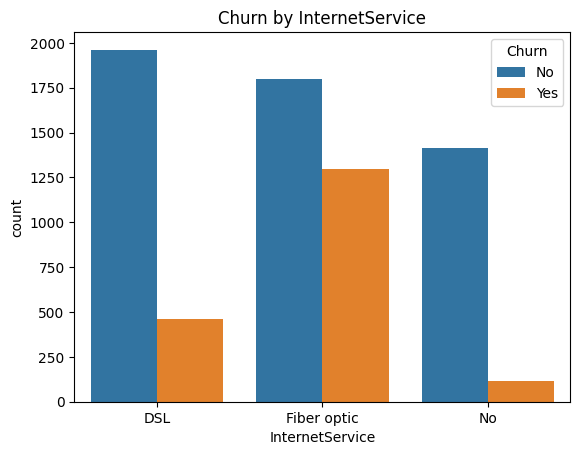

In [ ]:
#plt.figure(figsize=(6,4))
sns.countplot(data=tc, x="InternetService", hue="Churn")
plt.title("Churn by InternetService")
plt.show()

In [ ]:
print("Percentage of customer with InternetService (DSL) who churned :", round((
    tc[(tc['InternetService'] == 'DSL') & (tc['Churn'] == 'Yes')].shape[0] /
    tc[tc['InternetService'] == 'DSL'].shape[0]
) * 100, 2), "%")

print("Percentage of customer with InternetService (Fiber Optic) who churned :", round((
    tc[(tc['InternetService'] == 'Fiber optic') & (tc['Churn'] == 'Yes')].shape[0] /
    tc[tc['InternetService'] == 'Fiber optic'].shape[0]
) * 100, 2), "%")

print("Percentage of customer with No InternetService who churned :", round((
    tc[(tc['InternetService'] == 'No') & (tc['Churn'] == 'Yes')].shape[0] /
    tc[tc['InternetService'] == 'No'].shape[0]
) * 100, 2), "%")

Percentage of customer with InternetService (DSL) who churned : 18.96 %
Percentage of customer with InternetService (Fiber Optic) who churned : 41.89 %
Percentage of customer with No InternetService who churned : 7.4 %


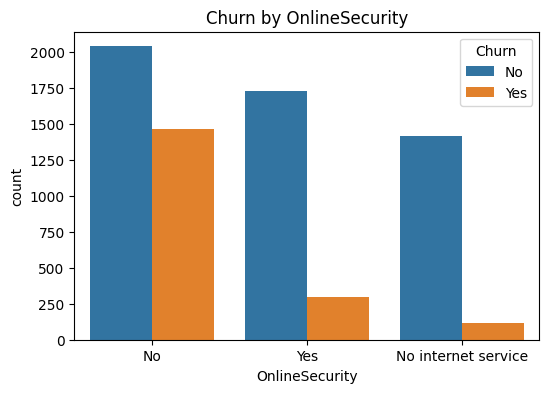

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=tc, x="OnlineSecurity", hue="Churn")
plt.title("Churn by OnlineSecurity")
plt.show()

In [ ]:
print("Percentage of customer having OnlineSecurity who churned :", round((
    tc[(tc['OnlineSecurity'] == 'Yes') & (tc['Churn'] == 'Yes')].shape[0] /
    tc[tc['OnlineSecurity'] == 'Yes'].shape[0]
) * 100, 2), "%")

print("Percentage of customer with No OnlineSecurity who churned :", round((
    tc[(tc['OnlineSecurity'] == 'No') & (tc['Churn'] == 'Yes')].shape[0] /
    tc[tc['OnlineSecurity'] == 'No'].shape[0]
) * 100, 2), "%")


print("Percentage of customer with No InternetService who churned :", round((
    tc[(tc['OnlineSecurity'] == 'No internet service') & (tc['Churn'] == 'Yes')].shape[0] /
    tc[tc['OnlineSecurity'] == 'No internet service'].shape[0]
) * 100, 2), "%")


Percentage of customer having OnlineSecurity who churned : 14.61 %
Percentage of customer with No OnlineSecurity who churned : 41.77 %
Percentage of customer with No InternetService who churned : 7.4 %


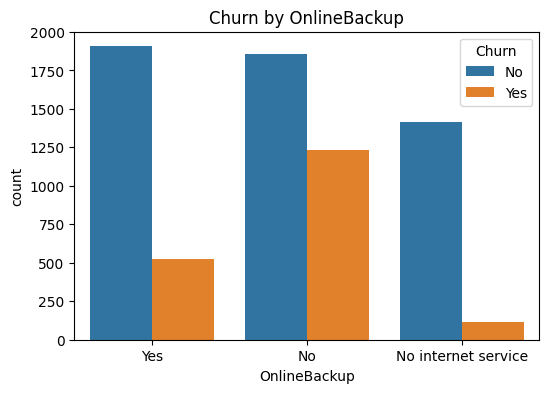

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=tc, x="OnlineBackup", hue="Churn")
plt.title("Churn by OnlineBackup")
plt.show()

In [ ]:
print("Percentage of customer having OnlineBackup who churned :", round((
    tc[(tc['OnlineBackup'] == 'Yes') & (tc['Churn'] == 'Yes')].shape[0] /
    tc[tc['OnlineBackup'] == 'Yes'].shape[0]
) * 100, 2), "%")

print("Percentage of people with No OnlineBackup who churned :", round((
    tc[(tc['OnlineBackup'] == 'No') & (tc['Churn'] == 'Yes')].shape[0] /
    tc[tc['OnlineBackup'] == 'No'].shape[0]
) * 100, 2), "%")

print("Percentage of people with No InternetService who churned :", round((
    tc[(tc['OnlineBackup'] == 'No internet service') & (tc['Churn'] == 'Yes')].shape[0] /
    tc[tc['OnlineBackup'] == 'No internet service'].shape[0]
) * 100, 2), "%")

Percentage of customer having OnlineBackup who churned : 21.53 %
Percentage of people with No OnlineBackup who churned : 39.93 %
Percentage of people with No InternetService who churned : 7.4 %


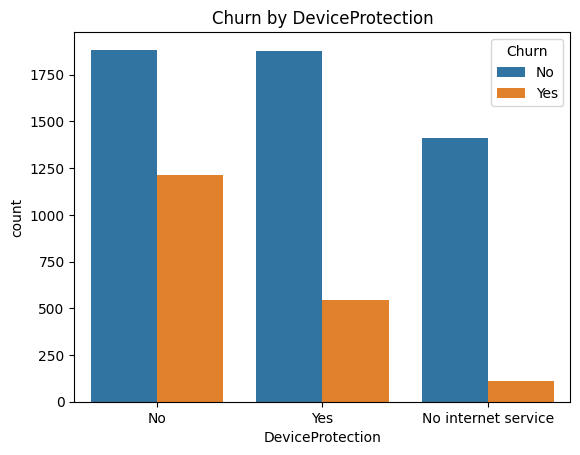

In [ ]:
#plt.figure(figsize=(6,4))
sns.countplot(data=tc, x="DeviceProtection", hue="Churn")
plt.title("Churn by DeviceProtection")
plt.show()

In [ ]:
print("Percentage of customer having DeviceProtection who churned :", round((
    tc[(tc['DeviceProtection'] == 'Yes') & (tc['Churn'] == 'Yes')].shape[0] /
    tc[tc['DeviceProtection'] == 'Yes'].shape[0]
) * 100, 2), "%")

print("Percentage of people with No DeviceProtection who churned :", round((
    tc[(tc['DeviceProtection'] == 'No') & (tc['Churn'] == 'Yes')].shape[0] /
    tc[tc['DeviceProtection'] == 'No'].shape[0]
) * 100, 2), "%")

print("Percentage of people with No InternetService who churned :", round((
    tc[(tc['DeviceProtection'] == 'No internet service') & (tc['Churn'] == 'Yes')].shape[0] /
    tc[tc['DeviceProtection'] == 'No internet service'].shape[0]
) * 100, 2), "%")

Percentage of customer having DeviceProtection who churned : 22.5 %
Percentage of people with No DeviceProtection who churned : 39.13 %
Percentage of people with No InternetService who churned : 7.4 %


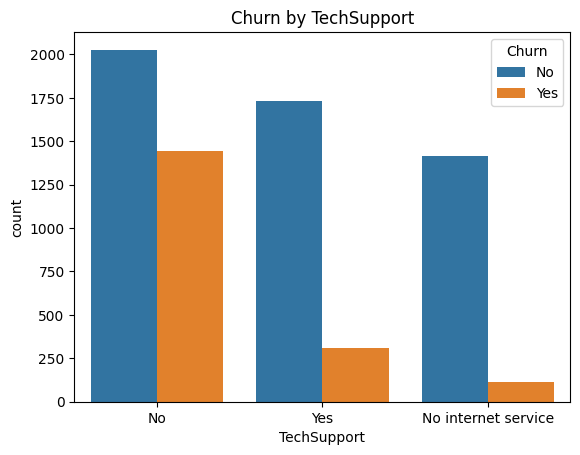

In [ ]:
#plt.figure(figsize=(6,4))
sns.countplot(data=tc, x="TechSupport", hue="Churn")
plt.title("Churn by TechSupport")
plt.show()

In [ ]:
print("Percentage of customer having TechSupport who churned :", round((
    tc[(tc['TechSupport'] == 'Yes') & (tc['Churn'] == 'Yes')].shape[0] /
    tc[tc['TechSupport'] == 'Yes'].shape[0]
) * 100, 2), "%")

print("Percentage of customer having No TechSupport who churned :", round((
    tc[(tc['TechSupport'] == 'No') & (tc['Churn'] == 'Yes')].shape[0] /
    tc[tc['TechSupport'] == 'No'].shape[0]
) * 100, 2), "%")

print("Percentage of customer having No internet service who churned :", round((
    tc[(tc['TechSupport'] == 'No internet service') & (tc['Churn'] == 'Yes')].shape[0] /
    tc[tc['TechSupport'] == 'No internet service'].shape[0]
) * 100, 2), "%")

Percentage of customer having TechSupport who churned : 15.17 %
Percentage of customer having No TechSupport who churned : 41.64 %
Percentage of customer having No internet service who churned : 7.4 %


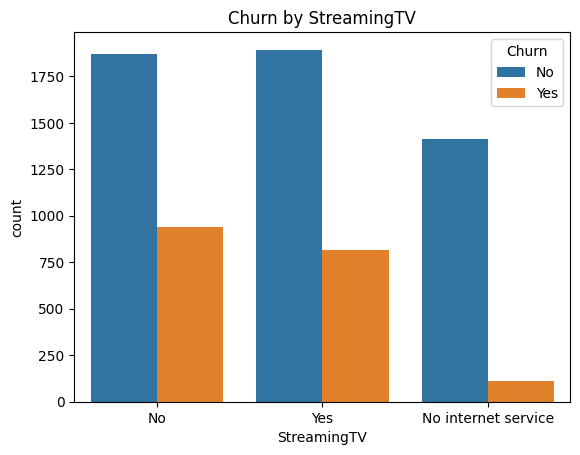

In [ ]:
#plt.figure(figsize=(6,4))
sns.countplot(data=tc, x="StreamingTV", hue="Churn")
plt.title("Churn by StreamingTV")
plt.show()

In [ ]:
print("Percentage of customer StreamingTV who churned :", round((
    tc[(tc['StreamingTV'] == 'Yes') & (tc['Churn'] == 'Yes')].shape[0] /
    tc[tc['StreamingTV'] == 'Yes'].shape[0]
) * 100, 2), "%")

print("Percentage of customer Not StreamingTV who churned :", round((
    tc[(tc['StreamingTV'] == 'No') & (tc['Churn'] == 'Yes')].shape[0] /
    tc[tc['StreamingTV'] == 'No'].shape[0]
) * 100, 2), "%")

print("Percentage of people with No InternetService who churned :", round((
    tc[(tc['StreamingTV'] == 'No internet service') & (tc['Churn'] == 'Yes')].shape[0] /
    tc[tc['StreamingTV'] == 'No internet service'].shape[0]
) * 100, 2), "%")

Percentage of customer StreamingTV who churned : 30.07 %
Percentage of customer Not StreamingTV who churned : 33.52 %
Percentage of people with No InternetService who churned : 7.4 %


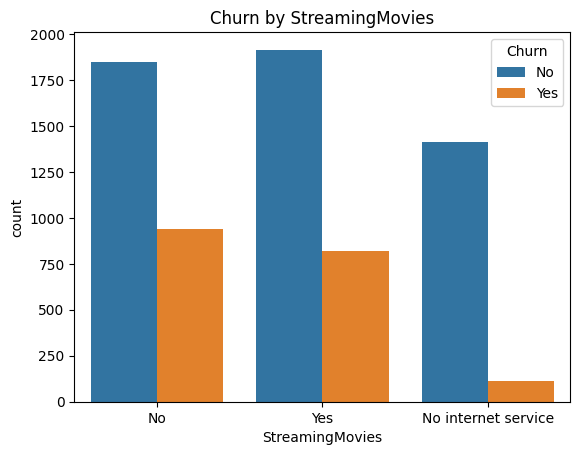

In [ ]:
#plt.figure(figsize=(6,4))
sns.countplot(data=tc, x="StreamingMovies", hue="Churn")
plt.title("Churn by StreamingMovies")
plt.show()

In [ ]:
print("Percentage of people StreamingMovies who churned :", round((
    tc[(tc['StreamingMovies'] == 'Yes') & (tc['Churn'] == 'Yes')].shape[0] /
    tc[tc['StreamingMovies'] == 'Yes'].shape[0]
) * 100, 2), "%")

print("Percentage of people not StreamingMovies who churned :", round((
    tc[(tc['StreamingMovies'] == 'No') & (tc['Churn'] == 'Yes')].shape[0] /
    tc[tc['StreamingMovies'] == 'No'].shape[0]
) * 100, 2), "%")

print("Percentage of people with No InternetService who churned :", round((
    tc[(tc['StreamingMovies'] == 'No internet service') & (tc['Churn'] == 'Yes')].shape[0] /
    tc[tc['StreamingMovies'] == 'No internet service'].shape[0]
) * 100, 2), "%")


Percentage of people StreamingMovies who churned : 29.94 %
Percentage of people not StreamingMovies who churned : 33.68 %
Percentage of people with No InternetService who churned : 7.4 %


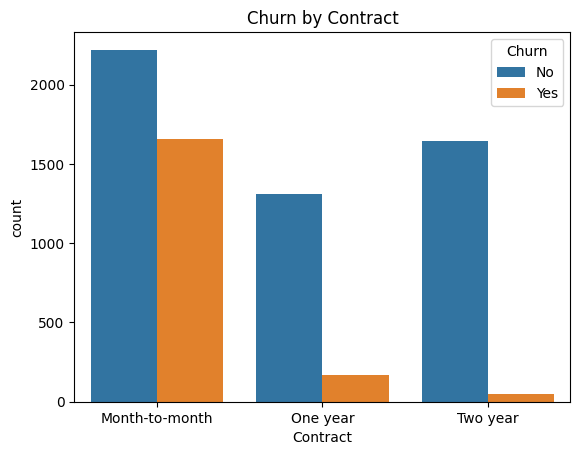

In [ ]:
#plt.figure(figsize=(6,4))
sns.countplot(data=tc, x="Contract", hue="Churn")
plt.title("Churn by Contract")
plt.show()

In [ ]:
print("Percentage of people having Month-to-month contract who churned :", round((
    tc[(tc['Contract'] == 'Month-to-month') & (tc['Churn'] == 'Yes')].shape[0] /
    tc[tc['Contract'] == 'Month-to-month'].shape[0]
) * 100, 2), "%")

print("Percentage of people having One year contract who churned :", round((
    tc[(tc['Contract'] == 'One year') & (tc['Churn'] == 'Yes')].shape[0] /
    tc[tc['Contract'] == 'One year'].shape[0]
) * 100, 2), "%")

print("Percentage of people with two year contract who churned :", round((
    tc[(tc['Contract'] == 'Two year') & (tc['Churn'] == 'Yes')].shape[0] /
    tc[tc['Contract'] == 'Two year'].shape[0]
) * 100, 2), "%")

Percentage of people having Month-to-month contract who churned : 42.71 %
Percentage of people having One year contract who churned : 11.27 %
Percentage of people with two year contract who churned : 2.83 %


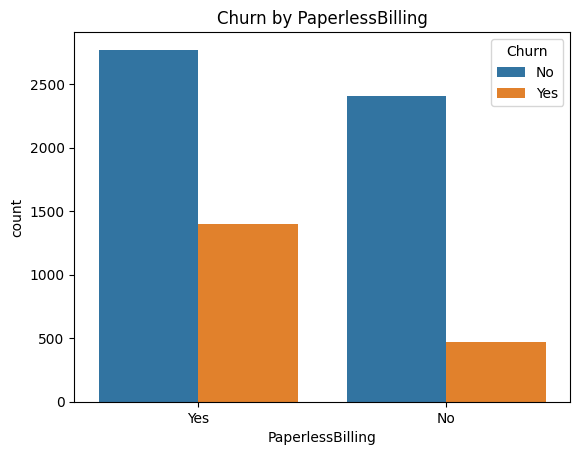

In [ ]:
#plt.figure(figsize=(6,4))
sns.countplot(data=tc, x="PaperlessBilling", hue="Churn")
plt.title("Churn by PaperlessBilling")
plt.show()

In [ ]:
print("Percentage of people with PaperlessBilling who churned :", round((
    tc[(tc['PaperlessBilling'] == 'Yes') & (tc['Churn'] == 'Yes')].shape[0] /
    tc[tc['PaperlessBilling'] == 'Yes'].shape[0]
) * 100, 2), "%")

print("Percentage of people not having PaperlessBilling who churned :", round((
    tc[(tc['PaperlessBilling'] == 'No') & (tc['Churn'] == 'Yes')].shape[0] /
    tc[tc['PaperlessBilling'] == 'No'].shape[0]
) * 100, 2), "%")

Percentage of people with PaperlessBilling who churned : 33.57 %
Percentage of people not having PaperlessBilling who churned : 16.33 %


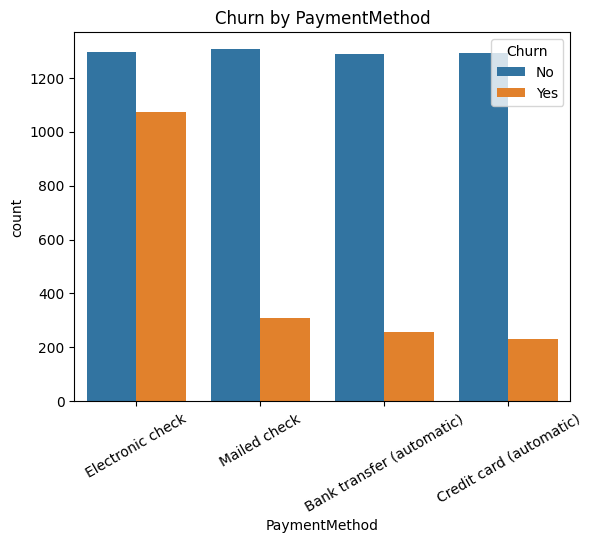

In [ ]:
#plt.figure(figsize=(6,4))
sns.countplot(data=tc, x="PaymentMethod", hue="Churn")
plt.xticks(rotation=30)
plt.title("Churn by PaymentMethod")
plt.show()

In [ ]:
tc['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [ ]:
print("Percentage of people having PaymentMethod (Electronic check) who churned :", round((
    tc[(tc['PaymentMethod'] == 'Electronic check') & (tc['Churn'] == 'Yes')].shape[0] /
    tc[tc['PaymentMethod'] == 'Electronic check'].shape[0]
) * 100, 2), "%")

print("Percentage of people having PaymentMethod (Mailed check) who churned :", round((
    tc[(tc['PaymentMethod'] == 'Mailed check') & (tc['Churn'] == 'Yes')].shape[0] /
    tc[tc['PaymentMethod'] == 'Mailed check'].shape[0]
) * 100, 2), "%")

print("Percentage of people having PaymentMethod (Bank transfer) who churned :", round((
    tc[(tc['PaymentMethod'] == 'Bank transfer (automatic)') & (tc['Churn'] == 'Yes')].shape[0] /
    tc[tc['PaymentMethod'] == 'Bank transfer (automatic)'].shape[0]
) * 100, 2), "%")

print("Percentage of people having PaymentMethod (Credit card) who churned :", round((
    tc[(tc['PaymentMethod'] == 'Credit card (automatic)') & (tc['Churn'] == 'Yes')].shape[0] /
    tc[tc['PaymentMethod'] == 'Credit card (automatic)'].shape[0]
) * 100, 2), "%")


Percentage of people having PaymentMethod (Electronic check) who churned : 45.29 %
Percentage of people having PaymentMethod (Mailed check) who churned : 19.11 %
Percentage of people having PaymentMethod (Bank transfer) who churned : 16.71 %
Percentage of people having PaymentMethod (Credit card) who churned : 15.24 %


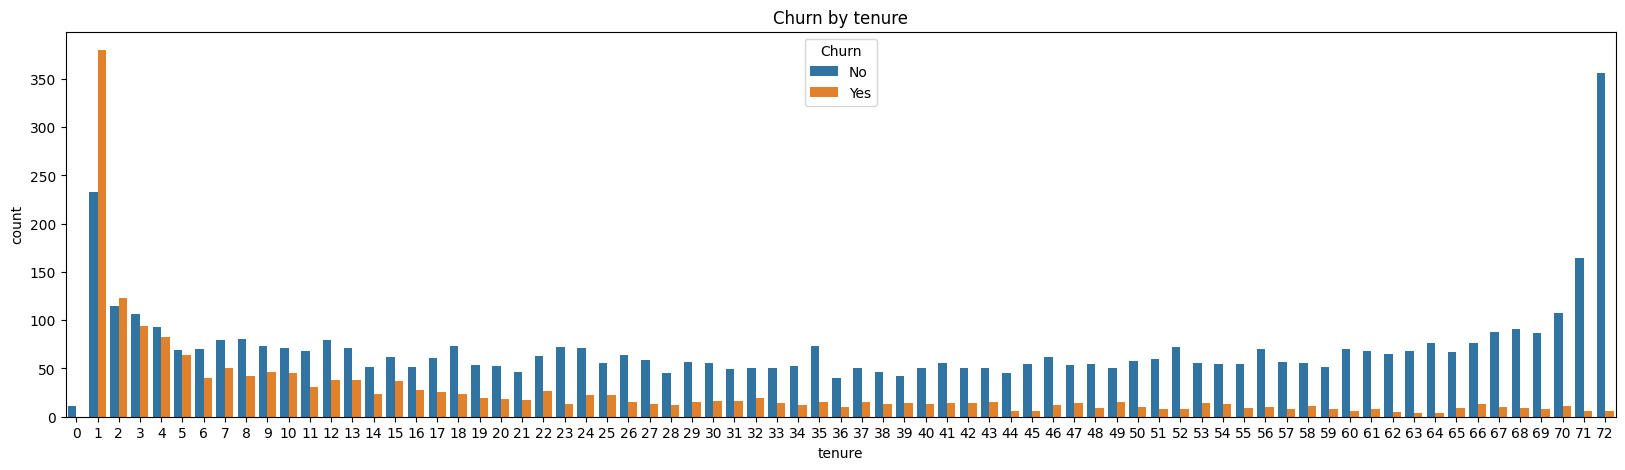

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(data=tc, x="tenure", hue="Churn")
#plt.xticks(rotation=30)
plt.title("Churn by tenure")
plt.show()

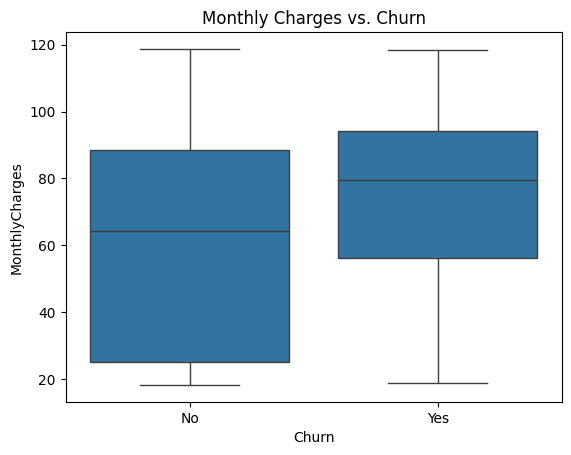

In [ ]:
#plt.figure(figsize=(6,4))
sns.boxplot(data=tc, x="Churn", y="MonthlyCharges")
plt.title("Monthly Charges vs. Churn")
plt.show()


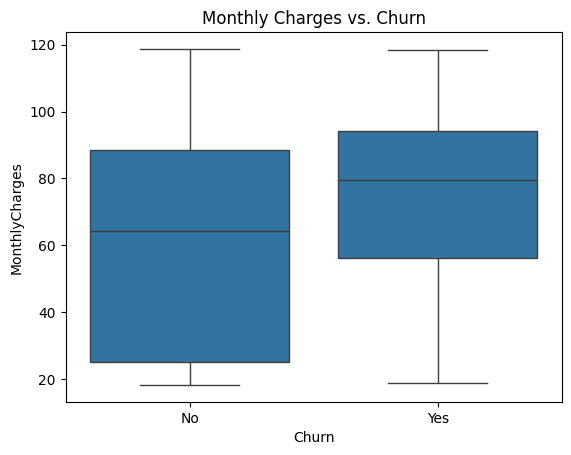

In [ ]:
#plt.figure(figsize=(6,4))
sns.boxplot(data=tc, x="Churn", y="MonthlyCharges")
plt.title("Monthly Charges vs. Churn")
plt.show()


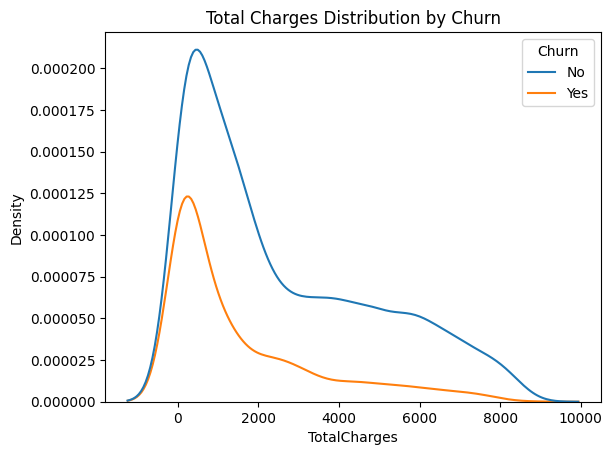

In [ ]:
#plt.figure(figsize=(6,4))
sns.kdeplot(data=tc, x="TotalCharges", hue="Churn")
plt.title("Total Charges Distribution by Churn")
plt.show()

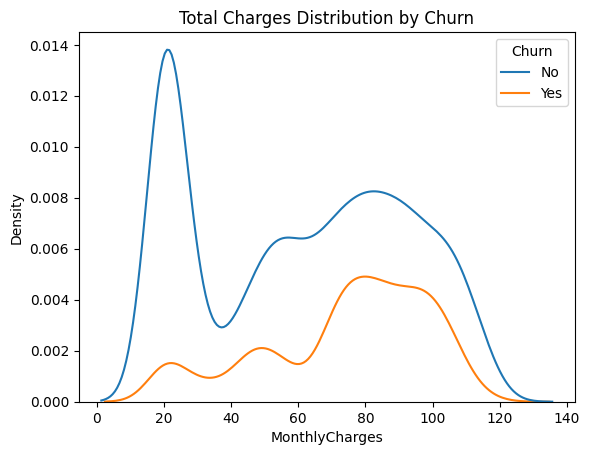

In [ ]:
#plt.figure(figsize=(6,4))
sns.kdeplot(data=tc, x="MonthlyCharges", hue="Churn")
plt.title("Total Charges Distribution by Churn")
plt.show()

# Model Creation

In [ ]:
Y = tc['Churn']
X = tc.drop(['Churn'], axis = 1)

In [ ]:
Y= Y.replace({"Yes" : 1, "No": 0})

/tmp/ipython-input-1065646563.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y= Y.replace({"Yes" : 1, "No": 0})


In [ ]:
X = pd.get_dummies(X,columns=['gender', 'Partner', 'Dependents','PhoneService', 'MultipleLines',
           'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],drop_first = True,dtype='int')

In [ ]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols = ["tenure","MonthlyCharges","TotalCharges"]

X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols]  = scaler.fit_transform(X_test[cols])

import pickle
pickle.dump(Scaler, open('scaler.pkl', 'wb'))


In [ ]:
X_train

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2142,0,-0.465683,-0.000474,-0.421345,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,1
1623,0,0.885537,1.074754,1.255888,0,0,0,1,0,1,...,0,1,0,1,0,1,1,0,0,0
6074,0,-1.284605,-1.376499,-1.002151,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1362,0,-1.161766,0.177346,-0.907292,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
6754,0,-1.325551,-0.098524,-0.394513,1,0,1,1,0,1,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,-1.284605,1.001632,-0.970509,1,1,0,1,0,0,...,0,1,0,1,0,0,1,0,1,0
5191,0,-0.383791,0.872006,-0.040362,0,1,1,1,0,1,...,0,1,0,1,0,1,1,1,0,0
5226,0,-0.834198,-1.452945,-0.877176,1,1,1,1,0,0,...,1,0,1,0,0,0,1,0,1,0
5390,1,-0.834198,1.149538,-0.481776,1,0,0,1,0,1,...,0,1,0,1,0,0,1,0,1,0


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

k_values = range(1, 31, 2)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)

    scores = cross_val_score(knn, X_train, Y_train, cv=5, scoring = "f1")

    cv_scores.append(scores.mean())

for k, score in zip(k_values, cv_scores):
    print(f"k = {k}, Mean CV score = {score:.4f}")

best_k = k_values[np.argmax(cv_scores)]
print(f"\nThe best k value(no. of neighbours) is {best_k}")

k = 1, Mean CV score = 0.4920
k = 3, Mean CV score = 0.5137
k = 5, Mean CV score = 0.5457
k = 7, Mean CV score = 0.5578
k = 9, Mean CV score = 0.5577
k = 11, Mean CV score = 0.5659
k = 13, Mean CV score = 0.5746
k = 15, Mean CV score = 0.5797
k = 17, Mean CV score = 0.5830
k = 19, Mean CV score = 0.5773
k = 21, Mean CV score = 0.5852
k = 23, Mean CV score = 0.5860
k = 25, Mean CV score = 0.5868
k = 27, Mean CV score = 0.5855
k = 29, Mean CV score = 0.5847

The best k value(no. of neighbours) is 25


Text(0, 0.5, 'f1-score')

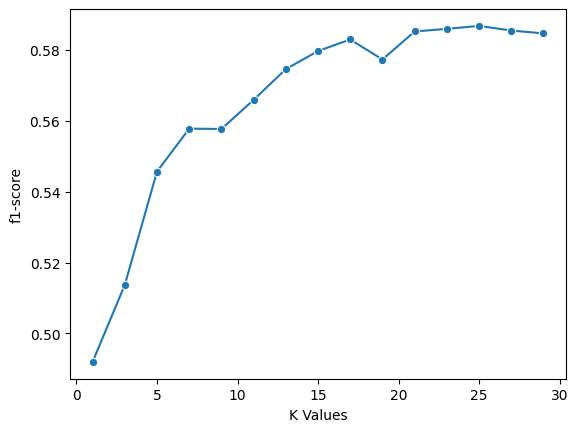

In [ ]:
sns.lineplot(x = k_values, y = cv_scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("f1-score")

In [ ]:
best_k = k_values[np.argmax(cv_scores)]
best_score = max(cv_scores)

print("Best k:", best_k)
print("Best f1-score:", best_score)


Best k: 25
Best f1-score: 0.5868160002401236


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
knn  = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train,Y_train)

y_pred_final = knn.predict(X_test)
print(f"\nF1 score: {f1_score(Y_test, y_pred_final)}")


F1 score: 0.6145092460881935


###Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,classification_report
from sklearn.model_selection import cross_val_score
import numpy as np


mx_iter = range(500, 5001, 500)
cv_scores_lr = []

for i in mx_iter:

  log_reg = LogisticRegression(max_iter=i, random_state=42)

  log_reg.fit(X_train, Y_train)

  score = cross_val_score(log_reg,X_train, Y_train, cv = 5, scoring ="f1" )

  cv_scores_lr.append(score.mean())

for i, score in zip(mx_iter, cv_scores_lr):
  print(f"max_iter = {i}, Mean CV score = {score:.4f}")

best_iter = mx_iter[np.argmax(cv_scores_lr)]
print(f"\nThe best max_iter value is {best_iter}")



max_iter = 500, Mean CV score = 0.5901
max_iter = 1000, Mean CV score = 0.5901
max_iter = 1500, Mean CV score = 0.5901
max_iter = 2000, Mean CV score = 0.5901
max_iter = 2500, Mean CV score = 0.5901
max_iter = 3000, Mean CV score = 0.5901
max_iter = 3500, Mean CV score = 0.5901
max_iter = 4000, Mean CV score = 0.5901
max_iter = 4500, Mean CV score = 0.5901
max_iter = 5000, Mean CV score = 0.5901

The best max_iter value is 500


In [ ]:
log_reg = LogisticRegression(max_iter = 500, random_state = 42)
log_reg.fit(X_train, Y_train)

y_pred_final = log_reg.predict(X_test)

print("F1 score:")
print(f1_score(Y_test, y_pred_final))


F1 score:
0.6388489208633094


###Random Forest Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5
)

grid_rf.fit(X_train, Y_train)

print(f"Best Parameters: {grid_rf.best_params_}")
print(f"Best CV score: {grid_rf.best_score_:.4f}")

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best CV score: 0.8037


In [ ]:
best_rf = grid_rf.best_estimator_

y_pred = best_rf.predict(X_test)


from sklearn.metrics import f1_score

print(f"F1 score: {f1_score(Y_test, y_pred)}")


F1 score: 0.5777777777777777


# Model Creation Using Class Weights

##Logistic Regression using class_weight

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

mx_iter = range(500, 5001, 500)
cv_scores_lr = []

for i in mx_iter:

  log_reg = LogisticRegression(max_iter=i, random_state=42, class_weight="balanced")

  log_reg.fit(X_train, Y_train)

  score = cross_val_score(log_reg,X_train, Y_train, cv = 5, scoring ="f1" )

  cv_scores_lr.append(score.mean())

for i, score in zip(mx_iter, cv_scores_lr):
  print(f"max_iter = {i}, Mean CV score = {score:.4f}")

best_iter = mx_iter[np.argmax(cv_scores_lr)]
print(f"\nThe best max_iter value is {best_iter}")



max_iter = 500, Mean CV score = 0.6216
max_iter = 1000, Mean CV score = 0.6216
max_iter = 1500, Mean CV score = 0.6216
max_iter = 2000, Mean CV score = 0.6216
max_iter = 2500, Mean CV score = 0.6216
max_iter = 3000, Mean CV score = 0.6216
max_iter = 3500, Mean CV score = 0.6216
max_iter = 4000, Mean CV score = 0.6216
max_iter = 4500, Mean CV score = 0.6216
max_iter = 5000, Mean CV score = 0.6216

The best max_iter value is 500


In [ ]:
log_reg = LogisticRegression(max_iter = 500, random_state = 42, class_weight='balanced')
log_reg.fit(X_train, Y_train)

y_pred_final = log_reg.predict(X_test)

print(f"\nF1 score: {f1_score(Y_test, y_pred_final)}")



F1 score: 0.6371134020618556



## Random Forest using class_weight

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight="balanced"),
    param_grid,
    cv=5
)

grid_rf.fit(X_train, Y_train)

print(f"Best Parameters: {grid_rf.best_params_}")
print(f"Best CV score: {grid_rf.best_score_:.4f}")

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best CV score: 0.7920


In [ ]:
best_rf = grid_rf.best_estimator_

y_pred_final = best_rf.predict(X_test)


from sklearn.metrics import f1_score

print(f"F1 score: {f1_score(Y_test, y_pred_final)}")

F1 score: 0.5234248788368336


## UnderSampling




In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

X_train_u, Y_train_u = rus.fit_resample(X_train, Y_train)


In [ ]:
print(f"Size of train before undersampling: {X_train.shape}")
print(f"Size of train after undersampling: {X_train_u.shape}")

Size of train before undersampling: (5634, 30)
Size of train after undersampling: (2992, 30)


In [ ]:
import pandas as pd

print(f"Value counts before undersampling: {Y_train.value_counts()}")
print(f"\nValue counts after undersampling: {Y_train_u.value_counts()}")

Value counts before undersampling: Churn
0    4138
1    1496
Name: count, dtype: int64

Value counts after undersampling: Churn
0    1496
1    1496
Name: count, dtype: int64


### KNN Classifier Model (UnderSampling)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

k_values = range(1, 31, 2)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)

    scores = cross_val_score(knn, X_train_u, Y_train_u, cv=5, scoring = "f1")

    cv_scores.append(scores.mean())

for k, score in zip(k_values, cv_scores):
    print(f"k = {k}, Mean CV score = {score:.4f}")

best_k = k_values[np.argmax(cv_scores)]
print(f"\nThe best k value(no. of neighbours) is {best_k}")

k = 1, Mean CV score = 0.6766
k = 3, Mean CV score = 0.7170
k = 5, Mean CV score = 0.7415
k = 7, Mean CV score = 0.7521
k = 9, Mean CV score = 0.7571
k = 11, Mean CV score = 0.7625
k = 13, Mean CV score = 0.7631
k = 15, Mean CV score = 0.7637
k = 17, Mean CV score = 0.7632
k = 19, Mean CV score = 0.7638
k = 21, Mean CV score = 0.7626
k = 23, Mean CV score = 0.7650
k = 25, Mean CV score = 0.7675
k = 27, Mean CV score = 0.7705
k = 29, Mean CV score = 0.7747

The best k value(no. of neighbours) is 29


Text(0, 0.5, 'f1-score')

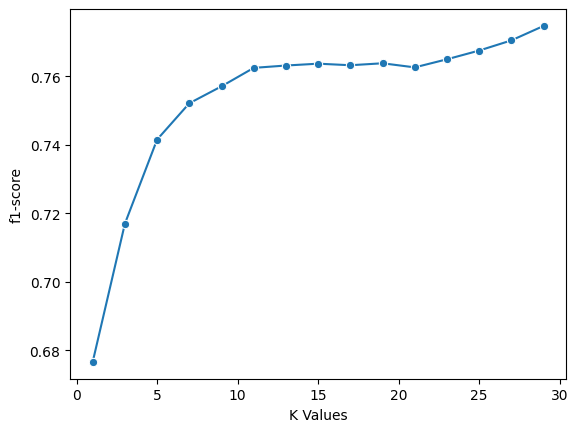

In [ ]:
sns.lineplot(x = k_values, y = cv_scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("f1-score")

In [ ]:
best_k = k_values[np.argmax(cv_scores)]
best_score = max(cv_scores)

print("Best k:", best_k)
print("Best f1-score:", best_score)


Best k: 29
Best f1-score: 0.7747059582542415


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
knn  = KNeighborsClassifier(n_neighbors=29)
knn.fit(X_train,Y_train)

y_pred_final = knn.predict(X_test)
print(f"\nF1 score: {f1_score(Y_test, y_pred_final)}")


F1 score: 0.6228571428571429


### Logistic regression (UnderSampling)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

mx_iter = range(500, 5001, 500)
cv_scores_lr = []

for i in mx_iter:

  log_reg = LogisticRegression(max_iter=i, random_state=42)

  log_reg.fit(X_train_u, Y_train_u)

  score = cross_val_score(log_reg,X_train_u, Y_train_u, cv = 5, scoring ="f1" )

  cv_scores_lr.append(score.mean())

for i, score in zip(mx_iter, cv_scores_lr):
  print(f"max_iter = {i}, Mean CV score = {score:.4f}")

best_iter = mx_iter[np.argmax(cv_scores_lr)]
print(f"\nThe best max_iter value is {best_iter}")



max_iter = 500, Mean CV score = 0.7682
max_iter = 1000, Mean CV score = 0.7682
max_iter = 1500, Mean CV score = 0.7682
max_iter = 2000, Mean CV score = 0.7682
max_iter = 2500, Mean CV score = 0.7682
max_iter = 3000, Mean CV score = 0.7682
max_iter = 3500, Mean CV score = 0.7682
max_iter = 4000, Mean CV score = 0.7682
max_iter = 4500, Mean CV score = 0.7682
max_iter = 5000, Mean CV score = 0.7682

The best max_iter value is 500


In [ ]:
log_reg = LogisticRegression(max_iter = 500, random_state = 42)
log_reg.fit(X_train_u, Y_train_u)

y_pred_final = log_reg.predict(X_test)

print(f"F1 score: {f1_score(Y_test, y_pred_final)}")


F1 score: 0.6371134020618556


### Random Forest (UnderSampling)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5
)

grid_rf.fit(X_train_u, Y_train_u)

print(f"Best Parameters: {grid_rf.best_params_}")
print(f"Best CV score: {grid_rf.best_score_:.4f}")

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best CV score: 0.7607


In [ ]:
best_rf = grid_rf.best_estimator_

y_pred_final = best_rf.predict(X_test)


from sklearn.metrics import f1_score

print(f"F1 score: {f1_score(Y_test, y_pred_final)}")


F1 score: 0.6480086114101185


###Conclusion
After UnderSampling, from the models, the model with the best f1-score (0.77) is K Nearest Classifier (k=29).

### Oversampling (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

In [ ]:
print(f"Size of train before SMOTE: {X_train.shape}")
print(f"Size of train after SMOTE: {X_train_smote.shape}")

Size of train before SMOTE: (5634, 30)
Size of train after SMOTE: (8276, 30)


In [ ]:
print(f"Value counts before SMOTE: {Y_train.value_counts()}")
print(f"\nValue counts after SMOTE: {Y_train_smote.value_counts()}")

Value counts before SMOTE: Churn
0    4138
1    1496
Name: count, dtype: int64

Value counts after SMOTE: Churn
0    4138
1    4138
Name: count, dtype: int64


### KNN(SMOTE)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

k_values = range(1, 31, 2)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)

    scores = cross_val_score(knn, X_train_smote, Y_train_smote, cv=5, scoring = "f1")

    cv_scores.append(scores.mean())

for k, score in zip(k_values, cv_scores):
    print(f"k = {k}, Mean CV score = {score:.4f}")

best_k = k_values[np.argmax(cv_scores)]
print(f"\nThe best k value(no. of neighbours) is {best_k}")

k = 1, Mean CV score = 0.8247
k = 3, Mean CV score = 0.8273
k = 5, Mean CV score = 0.8244
k = 7, Mean CV score = 0.8220
k = 9, Mean CV score = 0.8191
k = 11, Mean CV score = 0.8176
k = 13, Mean CV score = 0.8153
k = 15, Mean CV score = 0.8131
k = 17, Mean CV score = 0.8108
k = 19, Mean CV score = 0.8074
k = 21, Mean CV score = 0.8057
k = 23, Mean CV score = 0.8036
k = 25, Mean CV score = 0.8033
k = 27, Mean CV score = 0.8011
k = 29, Mean CV score = 0.8005

The best k value(no. of neighbours) is 3


Text(0, 0.5, 'f1-score')

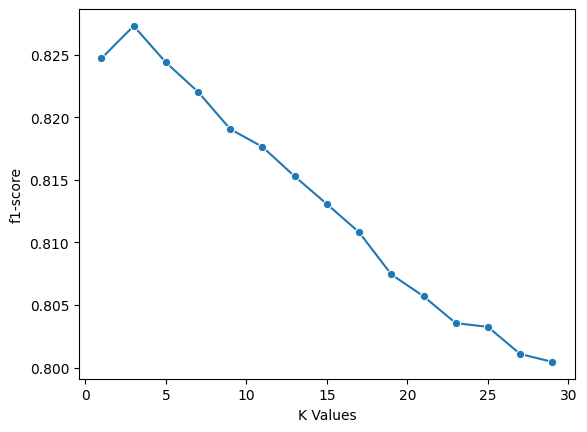

In [ ]:
sns.lineplot(x = k_values, y = cv_scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("f1-score")

In [ ]:
best_k = k_values[np.argmax(cv_scores)]
best_score = max(cv_scores)

print("Best k:", best_k)
print("Best f1-score:", best_score)


Best k: 3
Best f1-score: 0.8273120731374849


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_smote, Y_train_smote)

y_pred_final = knn.predict(X_test)
print(f"\nF1 score: {f1_score(Y_test, y_pred_final)}")


F1 score: 0.5446527012127894


### Logistic Regression (SMOTE)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

mx_iter = range(500, 5001, 500)
cv_scores_lr = []

for i in mx_iter:

  log_reg = LogisticRegression(max_iter=i, random_state=42)

  log_reg.fit(X_train_smote, Y_train_smote)

  score = cross_val_score(log_reg,X_train_smote, Y_train_smote, cv = 5, scoring ="f1" )

  cv_scores_lr.append(score.mean())

for i, score in zip(mx_iter, cv_scores_lr):
  print(f"max_iter = {i}, Mean CV score = {score:.4f}")

best_iter = mx_iter[np.argmax(cv_scores_lr)]
print(f"\nThe best max_iter value is {best_iter}")



max_iter = 500, Mean CV score = 0.7935
max_iter = 1000, Mean CV score = 0.7935
max_iter = 1500, Mean CV score = 0.7935
max_iter = 2000, Mean CV score = 0.7935
max_iter = 2500, Mean CV score = 0.7935
max_iter = 3000, Mean CV score = 0.7935
max_iter = 3500, Mean CV score = 0.7935
max_iter = 4000, Mean CV score = 0.7935
max_iter = 4500, Mean CV score = 0.7935
max_iter = 5000, Mean CV score = 0.7935

The best max_iter value is 500


In [ ]:
log_reg = LogisticRegression(max_iter = 500, random_state = 42)
log_reg.fit(X_train_smote, Y_train_smote)

y_pred_final = log_reg.predict(X_test)

print(f"F1 score: {f1_score(Y_test, y_pred_final)}")


F1 score: 0.6341463414634146


### Random Forest (SMOTE)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5
)

grid_rf.fit(X_train_smote, Y_train_smote)

print(f"Best Parameters: {grid_rf.best_params_}")
print(f"Best CV score: {grid_rf.best_score_:.4f}")

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best CV score: 0.8446


In [ ]:
best_rf = grid_rf.best_estimator_

y_pred_final = best_rf.predict(X_test)


from sklearn.metrics import f1_score

print(f"F1 score: {f1_score(Y_test, y_pred_final)}")


F1 score: 0.6151960784313726


### Conclusion
After SMOTE, from the observed models, the model with the best f1-score (0.83) is KNN with (k=3).

### XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

#scale_pos_weight compensates class imbalance
scale_pos_weight = Y_train.value_counts()[0] / Y_train.value_counts()[1]

xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42,
    scale_pos_weight=scale_pos_weight
)

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7]
}

grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="f1",
    cv=5
)

grid.fit(X_train, Y_train) # X_train_sm is scaled data


print("Best Params:", grid.best_params_)
print(f"Best CV score: {grid.best_score_:.4f}")


Best Params: {'max_depth': 3, 'n_estimators': 100}
Best CV score: 0.6109


In [ ]:
best_xg = grid.best_estimator_

y_pred_final = best_xg.predict(X_test)

from sklearn.metrics import f1_score

print(f"F1 score: {f1_score(Y_test, y_pred_final)}")


F1 score: 0.6395721925133689


In [ ]:
import pickle
pickle.dump(best_xg, open('xgb_model.pkl', 'wb'))


### The F1 score of XGBoosting model is 0.64.

Basic XGB

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train, Y_train)

y_pred = xgb.predict(X_test)

print(f"F1 score: {f1_score(Y_test, y_pred)}")

F1 score: 0.5520361990950227


### Out of all the models, KNN (SMOTE) with k = 3, outpurformed with f1 score = 0.827

# This notebook Ends HERE
REST is to be deleted.